In [27]:
%pip install captum

import torch
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
from torch.nn.functional import one_hot
import matplotlib.pyplot as plt
from captum.attr import IntegratedGradients

# Define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 10),
        )

    def forward(self, x):
        return self.layers(x)

# Create the model
model = MLP()

# Create a loader with the MNIST dataset
transform = transforms.ToTensor()
dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Split dataset into training and validation sets
train_dataset, val_dataset = random_split(dataset, [50000, 10000])

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=10, shuffle=True)

# Set loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
for epoch in range(10):  # number of times to loop over the dataset
    for images, labels in train_loader:
        # Convert labels to one-hot encoding
        labels_one_hot = one_hot(labels, num_classes=10).float()

        # Forward pass
        outputs = model(images)

        # Compute loss
        loss = loss_fn(outputs, labels_one_hot)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Training Epoch {epoch+1}, Loss: {loss.item()}')

    # Validation step
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in val_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        accuracy = 100 * correct / total
    print(f'Validation Accuracy after Epoch {epoch+1}: {accuracy}%')

Note: you may need to restart the kernel to use updated packages.
Training Epoch 1, Loss: 0.01616501621901989
Validation Accuracy after Epoch 1: 92.96%
Training Epoch 2, Loss: 0.0029495356138795614
Validation Accuracy after Epoch 2: 95.14%
Training Epoch 3, Loss: 0.0004625983419828117
Validation Accuracy after Epoch 3: 96.29%
Training Epoch 4, Loss: 0.000340564496582374
Validation Accuracy after Epoch 4: 96.92%
Training Epoch 5, Loss: 0.0005833182367496192
Validation Accuracy after Epoch 5: 97.34%
Training Epoch 6, Loss: 0.0026806409005075693
Validation Accuracy after Epoch 6: 97.53%
Training Epoch 7, Loss: 0.047828543931245804
Validation Accuracy after Epoch 7: 97.64%
Training Epoch 8, Loss: 0.00022563597303815186
Validation Accuracy after Epoch 8: 97.77%
Training Epoch 9, Loss: 0.00020556847448460758
Validation Accuracy after Epoch 9: 97.76%
Training Epoch 10, Loss: 0.0013206289149820805
Validation Accuracy after Epoch 10: 98.16%


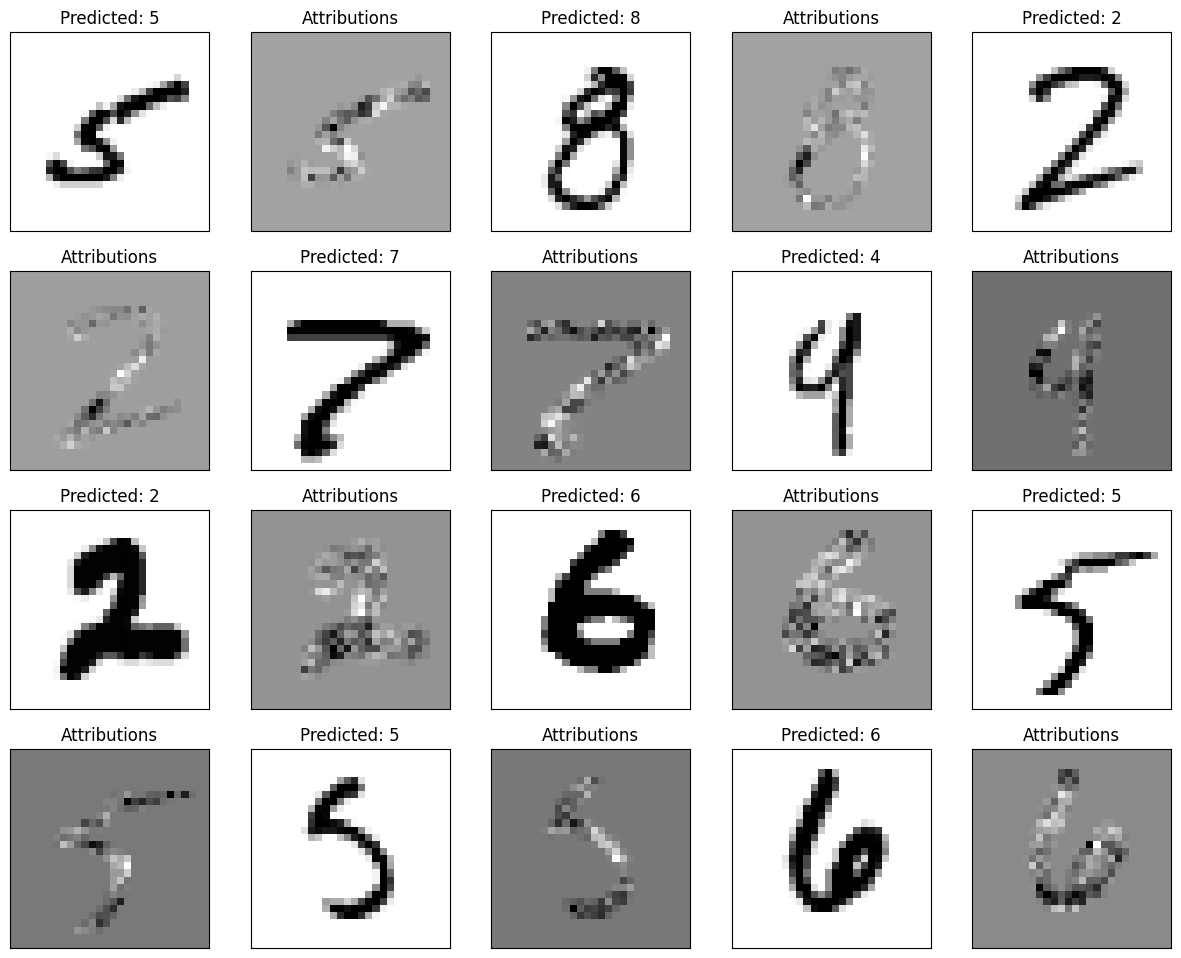

In [33]:
# Inference
model.eval()
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=True)
images, labels = next(iter(test_loader))
with torch.no_grad():
    outputs = model(images)

_, predicted = torch.max(outputs, 1)

# Integrated Gradients
ig = IntegratedGradients(model)
attributions, delta = ig.attribute(images, target=predicted, return_convergence_delta=True)

# Plot the images with the predicted labels and attributions
plt.figure(figsize=(15, 15))
for i in range(10):
    plt.subplot(5, 5, i*2 + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.title('Predicted: ' + str(predicted[i].item()))
    
    plt.subplot(5, 5, i*2 + 2)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(attributions[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.title('Attributions')
plt.show()